# GAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari
from keras.datasets import cifar100,cifar10


Using TensorFlow backend.


In [2]:
RUN_ID = '0016'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
label = 7
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data(label_mode='fine')

mask = [y[0]==label for y in y_train]

x_train = x_train[mask]
y_train = y_train[mask]

## architecture

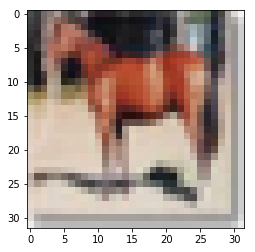

In [4]:
plt.imshow(x_train[200,:,:,:])

In [5]:
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_test = (x_test.astype('float32') - 127.5) / 127.5


In [6]:
print(np.min(x_train[0]))
print(np.max(x_train[0]))

-0.92941177
0.94509804


In [7]:
x_train.shape

(5000, 32, 32, 3)

In [8]:
gan = GAN(input_dim = (32,32,3)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008 
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004 
        , optimiser = 'rmsprop'
        , z_dim = 100
        )


gan.save(RUN_FOLDER)




In [9]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [10]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 32, 32, 3)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 16, 16, 64)        4864      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 8, 8, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [11]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
activation_5 (Activation)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 16, 16, 128)       204928    
__________

## training

In [ ]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
)



0 [D loss: 0.691943] [D acc: 0.535156] [G loss: 0.019292] [G acc: 1.000000]
1 [D loss: 5.228279] [D acc: 0.500000] [G loss: 0.649169] [G acc: 1.000000]
2 [D loss: 0.682088] [D acc: 0.500000] [G loss: 0.558472] [G acc: 1.000000]
3 [D loss: 0.631979] [D acc: 0.500000] [G loss: 0.161699] [G acc: 1.000000]
4 [D loss: 0.546626] [D acc: 0.500000] [G loss: 0.002849] [G acc: 1.000000]
5 [D loss: 0.592953] [D acc: 0.500000] [G loss: 0.090863] [G acc: 1.000000]
6 [D loss: 0.765048] [D acc: 0.492188] [G loss: 0.998967] [G acc: 0.210938]
7 [D loss: 0.695627] [D acc: 0.523438] [G loss: 0.556170] [G acc: 0.750000]
8 [D loss: 1.137044] [D acc: 0.234375] [G loss: 2.256217] [G acc: 0.000000]
9 [D loss: 0.550635] [D acc: 0.500000] [G loss: 0.991984] [G acc: 0.000000]
10 [D loss: 0.516382] [D acc: 0.503906] [G loss: 1.000885] [G acc: 0.000000]
11 [D loss: 0.559484] [D acc: 0.500000] [G loss: 0.807265] [G acc: 0.000000]
12 [D loss: 0.619340] [D acc: 0.503906] [G loss: 0.743548] [G acc: 0.000000]
13 [D los

107 [D loss: 0.329692] [D acc: 0.871094] [G loss: 1.416992] [G acc: 0.265625]
108 [D loss: 0.399941] [D acc: 0.839844] [G loss: 0.397034] [G acc: 0.812500]
109 [D loss: 0.277997] [D acc: 0.886719] [G loss: 6.503766] [G acc: 0.000000]
110 [D loss: 0.334048] [D acc: 0.843750] [G loss: 0.040579] [G acc: 0.992188]
111 [D loss: 0.714888] [D acc: 0.667969] [G loss: 6.734589] [G acc: 0.000000]
112 [D loss: 0.586320] [D acc: 0.781250] [G loss: 0.798839] [G acc: 0.445312]
113 [D loss: 0.884376] [D acc: 0.460938] [G loss: 1.364566] [G acc: 0.210938]
114 [D loss: 0.504184] [D acc: 0.730469] [G loss: 0.266108] [G acc: 0.859375]
115 [D loss: 0.513429] [D acc: 0.757812] [G loss: 0.335078] [G acc: 0.882812]
116 [D loss: 0.508816] [D acc: 0.761719] [G loss: 0.831120] [G acc: 0.539062]
117 [D loss: 0.472071] [D acc: 0.718750] [G loss: 0.725208] [G acc: 0.578125]
118 [D loss: 0.446693] [D acc: 0.753906] [G loss: 1.052777] [G acc: 0.406250]
119 [D loss: 0.409398] [D acc: 0.796875] [G loss: 1.361887] [G a

In [13]:
idx = np.random.randint(0, x_train.shape[0], 128)
true_imgs = x_train[idx]

noise = np.random.normal(0, 1, (128, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

x = np.concatenate([true_imgs, gen_imgs])
y = np.concatenate([np.ones((128,1)), np.zeros((128,1))])

In [ ]:
d_loss, d_acc = gan.discriminator.train_on_batch(x, y)

In [ ]:
d_loss

In [ ]:
plt.imshow((x[200]+1)*0.5)

In [ ]:
y[200]

In [15]:
gan.discriminator.test_on_batch(x, y)

[0.009636844, 0.99609375]

In [ ]:
plt.plot(g_accs, color='orange', linewidth=1)
plt.plot(d_accs, color='green', linewidth=1)



In [16]:
for i in range(10):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

[0.99999976]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


(32, 32, 3)


array([4.5723013e-06], dtype=float32)

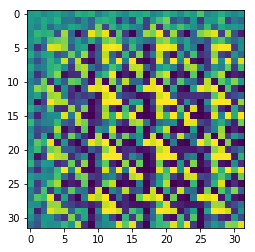

In [17]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))